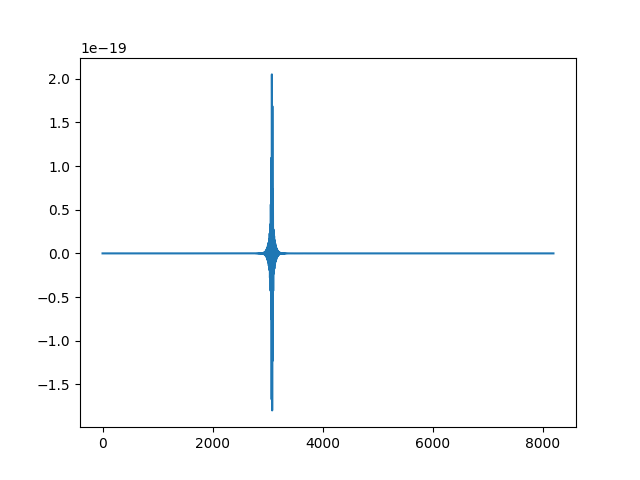

In [44]:
%matplotlib widget
from pycbc.waveform import get_td_waveform
from pycbc.detector import Detector
from hyperion.simulations import GWDetector
import bilby
import numpy as np
import matplotlib.pyplot as plt

hp, hc = get_td_waveform(approximant='IMRPhenomXPHM', delta_t = 1/1024, f_lower=100, mass1=100, mass2=10)
t_gps = 100000000
#hp.start_time += t_gps
#hc.start_time += t_gps
hp.duration

#plt.plot(hp.sample_times, hp)

#hpp = hp.cyclic_time_shift(2)
hp.cyclic_time_shift(0)
plt.plot(hp, alpha = 1)

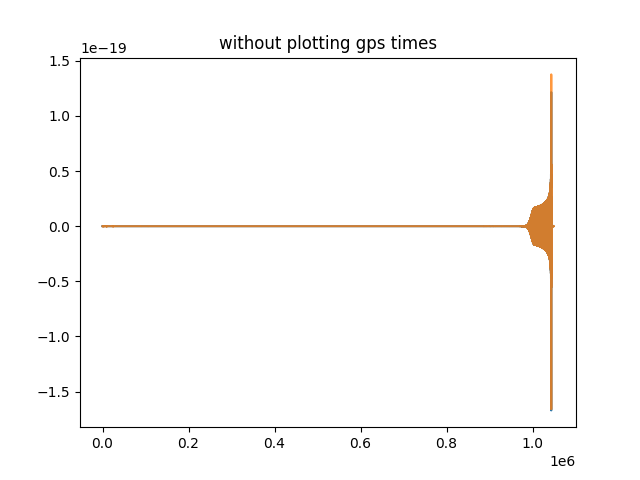

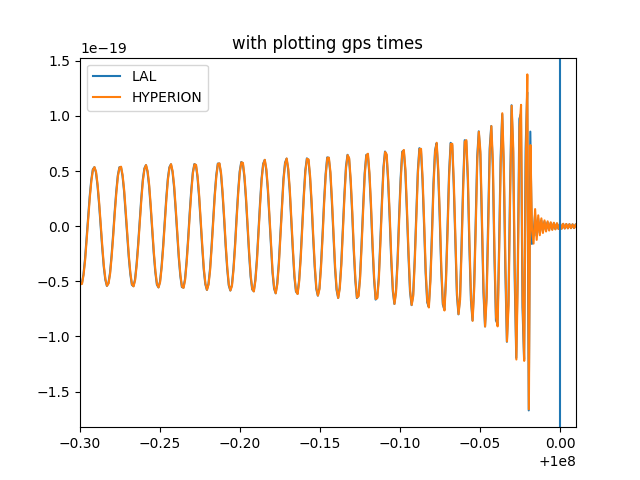

In [28]:
det_pycbc = Detector('L1')
det_hyp = GWDetector('L1')

kwargs = {'ra':1, 'dec':-np.pi, 'polarization':1}
method = 'lal'


h_pycbc = det_pycbc.project_wave(hp, hc, **kwargs, method = method)
h_hyp = det_hyp.project_wave(hp, hc, **kwargs, t_gps = np.array(hp.sample_times))


nmax = min(len(h_pycbc), len(h_hyp))



plt.figure()
plt.plot(h_pycbc.numpy()[-nmax:])
plt.plot(h_hyp.numpy()[-nmax:], alpha = 0.8)
#plt.plot(h_pycbc.numpy()[-nmax:] - h_hyp.numpy()[-nmax:])
plt.title('without plotting gps times')
plt.show()



t_pycbc = h_pycbc.sample_times.numpy()[-nmax:]
t_hyp = h_hyp.sample_times.numpy()[-nmax:]
dt = t_pycbc-t_hyp




plt.figure()
plt.plot(h_pycbc.sample_times, h_pycbc.numpy(), label = 'LAL')
plt.plot(h_hyp.sample_times-0.0175, h_hyp.numpy(), label = 'HYPERION')
plt.title('with plotting gps times')
plt.xlim(-.3 + t_gps, t_gps+.01)
plt.axvline(t_gps)
plt.legend()


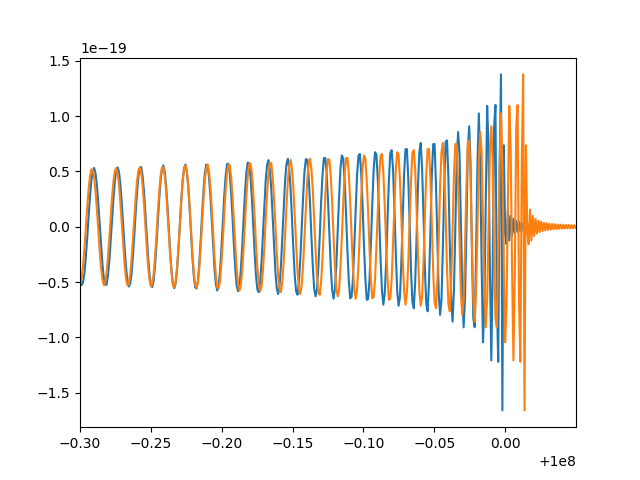

In [31]:
plt.figure()
dt_pycbc = det_pycbc.time_delay_from_earth_center(right_ascension=kwargs['ra'], declination=kwargs['dec'], t_gps = hp.sample_times.numpy())

plt.plot(h_hyp.sample_times, h_hyp.numpy(), label = 'HYPERION')
plt.plot(h_hyp.sample_times+dt, h_hyp.numpy(), label = 'HYPERION')

plt.xlim(-.3 + t_gps, t_gps+.05)

plt.show()

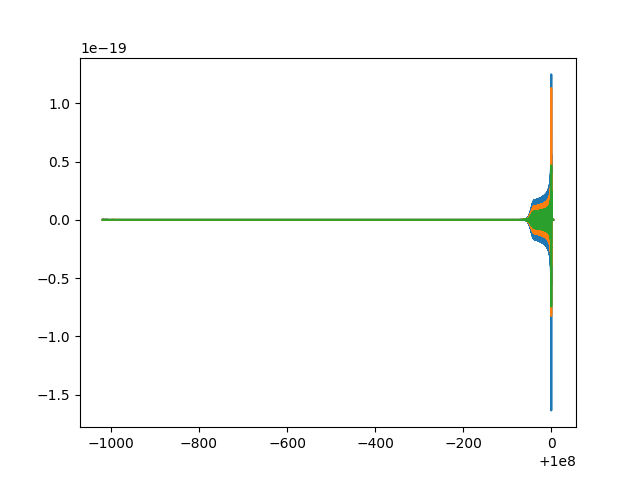

In [20]:
h = dict()
plt.figure()

for det in ['L1', 'H1', 'V1']:
    d = GWDetector(det)
    h[det] = d.project_wave(hp, hc, **kwargs, t_gps = np.array(hp.sample_times))
    
    plt.plot(hp.sample_times, h[det])
plt.show()

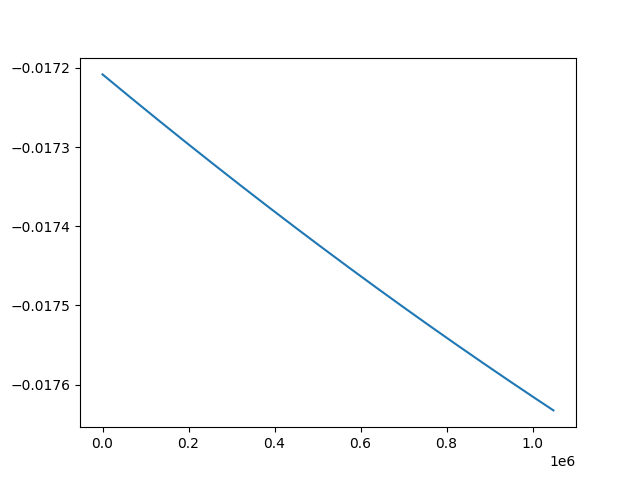

In [15]:
plt.figure()
plt.plot(dt_pycbc)

In [53]:
print(dt.mean())

#det_hyp.time_delay_from_earth_center(ra=kwargs['ra'], dec=kwargs['dec'], t_gps = hp.sample_times.numpy())
dt_pycbc = det_pycbc.time_delay_from_earth_center(right_ascension=kwargs['ra'], declination=kwargs['dec'], t_gps = hp.sample_times.numpy())

dt.mean()+dt_pycbc[-1]

0.015625


-0.002007512752024508

[]

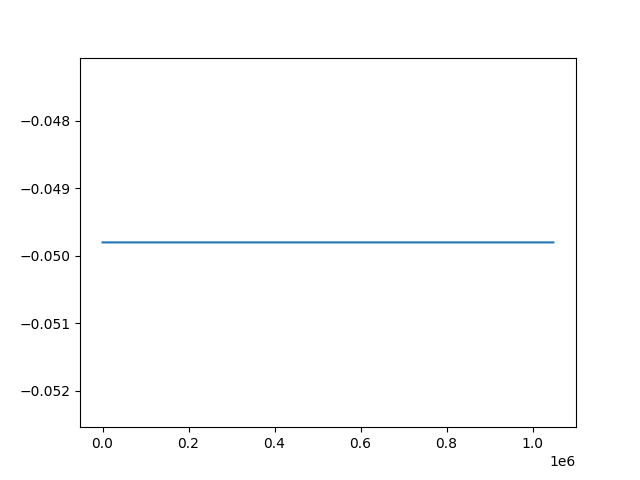

In [29]:
t_pycbc = h_pycbc.sample_times.numpy()[:nmax]
t_hyp = h_hyp.sample_times.numpy()[:nmax]

plt.figure()
plt.plot(t_pycbc-t_hyp)
#plt.plot(t_hyp)
plt.plot()

array([-0.04980469, -0.04980469, -0.04980469, ..., -0.04980469,
       -0.04980469, -0.04980469])

In [2]:
E1_pycbc = Detector('E1')
E2_pycbc = Detector('E2')
E3_pycbc = Detector('E3')

In [3]:
ET = bilby.gw.detector.InterferometerList(['ET'])
E1_bilby = ET[0]
E2_bilby = ET[1]
E3_bilby = ET[2]

In [4]:
#help(ET[0].get_detector_response)

In [5]:
np.rad2deg(E1_pycbc.latitude), np.rad2deg(E1_pycbc.longitude)

(43.63141447003932, 10.504496611112913)

In [6]:
E2_bilby.latitude, E1_bilby.longitude

(43.56317474679433, 10.504496611111112)

In [7]:
V1 = Detector('V1')
np.rad2deg(V1.latitude), np.rad2deg(V1.longitude)

L1 = Detector('L1')
np.rad2deg(L1.latitude), np.rad2deg(L1.longitude)

H1 = Detector('H1')
np.rad2deg(H1.latitude), np.rad2deg(H1.longitude)

K1 = Detector('K1')
np.rad2deg(K1.latitude), np.rad2deg(K1.longitude)

(36.411860338693614, 137.30595603097552)

In [8]:
L1 = Detector('L1')
np.rad2deg(L1.latitude), np.rad2deg(L1.longitude)

(30.562894331426406, -90.7742403888887)

In [9]:
d = Detector('V1')
np.rad2deg(d.latitude), np.rad2deg(d.longitude)

(43.63141447003932, 10.504496611112913)

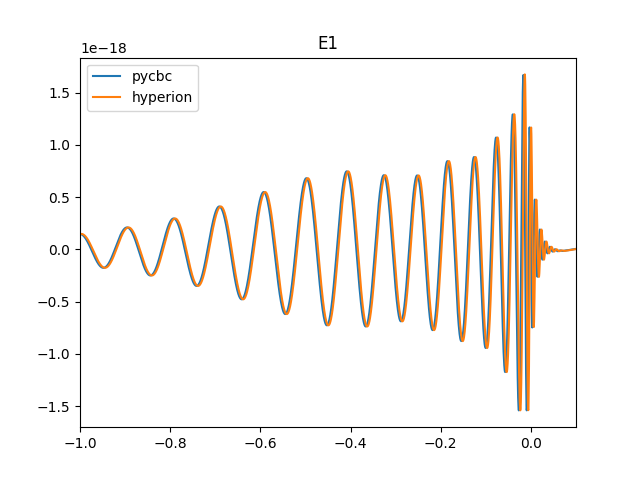

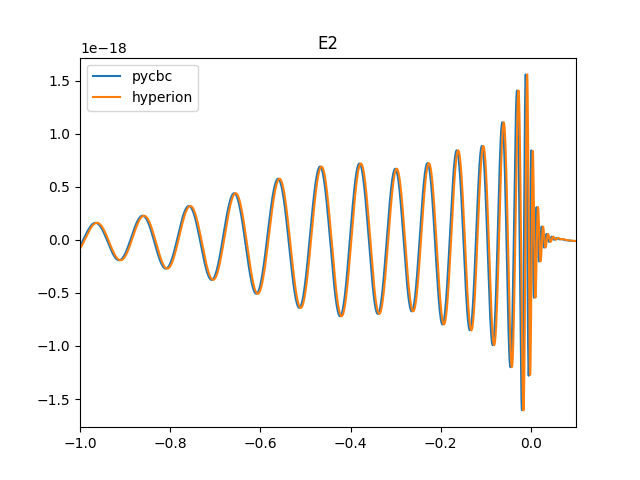

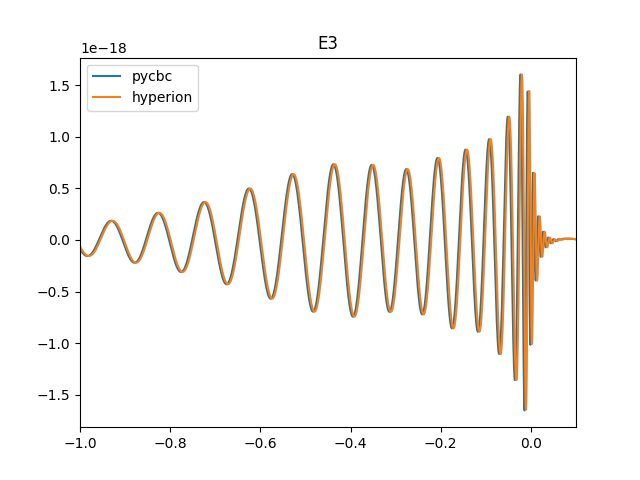

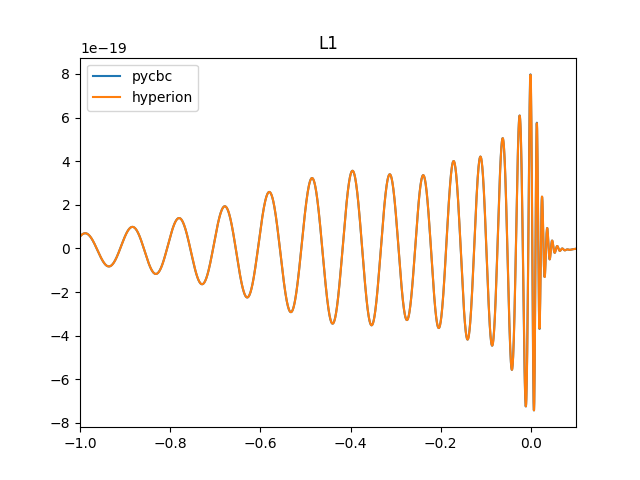

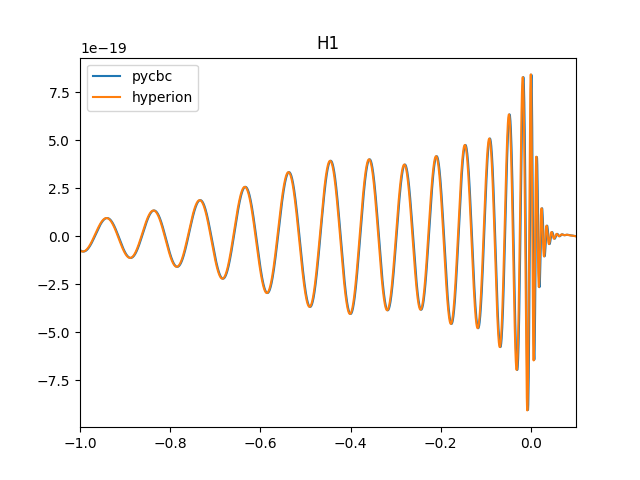

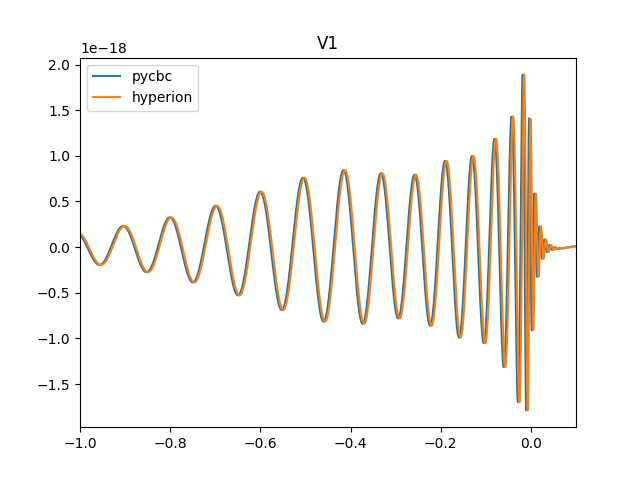

In [13]:
%matplotlib widget
for det in ['E1', 'E2', 'E3', 'L1', 'H1', 'V1']:
    d_pycbc = Detector(det)
    d_hyp = GWDetector(det)

    kwargs = {'ra':np.pi, 'dec':1, 'polarization':0}

    h_hyp = d_hyp.project_wave(hp, hc, t_gps = hp.sample_times, **kwargs)
    h_pycbc = d_pycbc.project_wave(hp, hc, reference_time = t_gps, **kwargs)
    
    dt = d_hyp.time_delay_from_earth_center(kwargs['ra'], kwargs['dec'])

    plt.figure()
    plt.plot(h_pycbc.sample_times, h_pycbc, label='pycbc')
    plt.plot(hp.sample_times+dt, h_hyp, label='hyperion')
    plt.legend()
    plt.title(det)
    plt.xlim(-1, .1)
    plt.show()

In [ ]:
et1_x = 70.5674 #bilby/pycbc
et1_y =  130.5674 ##bilby/pycbc

#et1_x = np.rad2deg(0.33916285222) #LAL
#et1_y = np.rad2deg(5.57515060820) #LAL



bisettrice = (et1_y-et1_x)/2
bisettrice + et1_x, np.mean([et1_x, et1_y])



In [76]:
import torch

x = {'a': torch.arange(10), 'b':torch.arange(10)}

t = torch.stack([ x[key] for key in x])

from hyperion.core.fft import rfft

rfft(t, n=t.shape[-1])

tensor([[ 45.+0.0000j, -10.+30.7768j, -10.+13.7638j, -10.+7.2654j, -10.+3.2492j,
         -10.+0.0000j],
        [ 45.+0.0000j, -10.+30.7768j, -10.+13.7638j, -10.+7.2654j, -10.+3.2492j,
         -10.+0.0000j]])

In [57]:
import torch
import torch.nn.functional as F

x = torch.tensor([10])

y = F.pad(x, (10,0))
y.roll(3)

tensor([ 0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0])

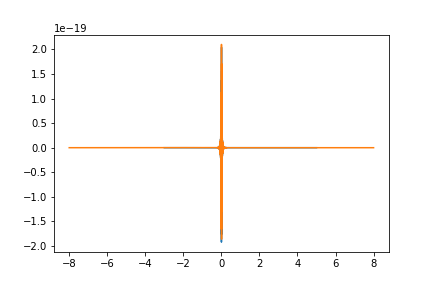

In [16]:
%matplotlib widget

hp, hc = get_td_waveform(approximant='IMRPhenomXPHM', delta_t = 1/2048, f_lower=100, mass1=100, mass2=10)


plt.figure()
plt.plot(hp.sample_times, hc)


hnew = hp.copy()
hnew.resize(int(2*hp.duration*hp.sample_rate))

hnew = hnew.cyclic_time_shift(0.5*(hnew.sample_times.max()+hp.sample_times.min()))


plt.plot(hnew.sample_times, hnew)


plt.show()

In [15]:
0.5*(hnew.sample_times.max()+hp.sample_times.min())

4.399755859375